Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read in the data. This will be combined into 1 dataframe called df

In [2]:
df = pd.read_csv('https://data.ca.gov/dataset/vehicle-fuel-type-count-by-zip-code/resource/9aa5b4c5-252c-4d68-b1be-ffe19a2f1d26/download/vehicle-fuel-type-count-by-zip-code.csv')
#df2 = pd.read_csv('https://data.ca.gov/dataset/vehicle-fuel-type-count-by-zip-code/resource/888bbb6c-09b4-469c-82e6-1b2a47439736/download/vehicle-fuel-type-count-by-zip-code.csv')
#df3 = pd.read_csv('https://data.ca.gov/dataset/vehicle-fuel-type-count-by-zip-code/resource/4254a06d-9937-4083-9441-65597dd267e8/download/vehicle-fuel-type-count-by-zip-code.csv')
#df4 = pd.read_csv('https://data.ca.gov/dataset/vehicle-fuel-type-count-by-zip-code/resource/d304108a-06c1-462f-a144-981dd0109900/download/vehicle-fuel-type-count-by-zip-code.csv')


C:\Users\schowdho\AppData\Local\Temp\ipykernel_15128\4093095119.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://data.ca.gov/dataset/vehicle-fuel-type-count-by-zip-code/resource/9aa5b4c5-252c-4d68-b1be-ffe19a2f1d26/download/vehicle-fuel-type-count-by-zip-code.csv')


Combine the data

In [3]:
#frames = [df1, df2, df3, df4]
#df = pd.concat(frames)


Explore some basic information of the data

In [4]:
df.head(100)


,Date,Zip Code,Model Year,Fuel,Make,Duty,Vehicles
0,12/31/2022,90000,2010,Gasoline,OTHER/UNK,Light,1
1,12/31/2022,90000,2012,Hybrid Gasoline,OTHER/UNK,Light,1
2,12/31/2022,90000,2013,Gasoline,OTHER/UNK,Light,1
3,12/31/2022,90000,<2009,Gasoline,OTHER/UNK,Heavy,19
4,12/31/2022,90000,<2009,Gasoline,OTHER/UNK,Light,16
...,...,...,...,...,...,...,...
95,12/31/2022,90001,2010,Gasoline,TOYOTA,Light,199
96,12/31/2022,90001,2010,Gasoline,MAZDA,Light,13
97,12/31/2022,90001,2010,Gasoline,BMW,Light,13
98,12/31/2022,90001,2010,Gasoline,HYUNDAI,Light,15


In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767054 entries, 0 to 767053
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Date        767054 non-null  object
 1   Zip Code    767054 non-null  object
 2   Model Year  767054 non-null  object
 3   Fuel        767054 non-null  object
 4   Make        767054 non-null  object
 5   Duty        767054 non-null  object
 6   Vehicles    767054 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 41.0+ MB


In [6]:
df.describe()

,Vehicles
count,767054.000000
mean,40.562764
std,125.711478
min,1.000000
25%,9.000000
50%,18.000000
75%,39.000000
max,37407.000000


In [7]:
df.shape

(767054, 7)

Check for null values. luckily there are none

In [8]:
df.isnull().sum()


Date          0
Zip Code      0
Model Year    0
Fuel          0
Make          0
Duty          0
Vehicles      0
dtype: int64

Convert the Date column to datetime format for easier reading

In [9]:
df['Date'] = pd.to_datetime(df['Date'])


Get the unique fuel types

In [10]:
df['Fuel'].unique()


array(['Gasoline', 'Hybrid Gasoline', 'Unk', 'Diesel and Diesel Hybrid',
       'Flex-Fuel', 'Natural Gas', 'Battery Electric', 'Plug-in Hybrid',
       'Other', 'Hydrogen Fuel Cell'], dtype=object)

Get the unique make types

In [11]:
df['Make'].unique()

array(['OTHER/UNK', 'FORD', 'PLYMOUTH', 'CHEVROLET', 'Unk', 'GMC',
       'WHITE', 'INFINITI', 'MERCEDES-BENZ', 'VOLKSWAGEN', 'DODGE',
       'JEEP', 'ACURA', 'HONDA', 'CHRYSLER', 'CADILLAC', 'NISSAN',
       'TOYOTA', 'MAZDA', 'BMW', 'HYUNDAI', 'LEXUS', 'KIA', 'SCION',
       'PONTIAC', 'FREIGHTLINER', 'RAM', 'AUDI', 'MINI', 'HINO',
       'MITSUBISHI', 'INTERNATIONAL', 'SUBARU', 'BUICK', 'TESLA',
       'MERCURY', 'LINCOLN', 'VOLVO', 'HUMMER', 'OLDSMOBILE', 'SATURN',
       'ISUZU', 'SUZUKI', 'LAND ROVER', 'PORSCHE', 'UNKNOWN', 'JAGUAR',
       'FIAT', 'GENESIS', 'SAAB', 'ALFA ROMEO', 'GEO', 'WORKHORSE',
       'AMERICAN LAFRANCE', 'NORTH AMERICAN BUS INDUSTRIES', 'PETERBILT',
       'MOTOR COACH INDUSTRIES', 'EL DORADO', 'NEW FLYER', 'KENWORTH',
       'GILLIG', 'BLUE BIRD', 'AUTOCAR', 'PIERCE', 'IC BUS', 'PROTERRA',
       'FWD', 'NEOPLAN', 'OSHKOSH', 'ORION', 'SEAGRAVE', 'STERLING',
       'FLXIBLE TRANSIT COACHES', 'MACK', 'TMC', 'WHITE/GMC', 'KALMAR',
       'PREVOST', 'MASERATI

In [12]:
# Select the 'Make' column
make_column_DMV2023 = df['Make'].unique()
# Create a DataFrame from the 'Make' column
make_df = pd.DataFrame({'Make': make_column_DMV2023})
# Export the DataFrame to Excel
make_df.to_excel('make_column_DMV2023.xlsx', index=False)

In [13]:
# Select the 'Make' column
make_column_DMV2023 = df['Make'].unique()
# Create a DataFrame from the 'Make' column
make_df = pd.DataFrame({'Make': make_column_DMV2023})
# Export the DataFrame to Excel
make_df.to_csv('make_column_DMV2023.csv', index=False)

In [32]:
# Filter the DataFrame to include only rows with 'Model Year' equal to 2018
df_2018 = df[df['Model Year'] == 2018]

# group the dataset by the 'Make' column and count the number of rows in each group
vehicles_by_Fuel_Duty = df.groupby([ 'Duty','Fuel', 'Model Year']).count()['Vehicles'].sort_values(ascending=False)

# print the results
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(vehicles_by_Fuel_Duty)
    
    # calculate the total number of vehicles
df['Vehicles'].sum()

Series([], Name: Vehicles, dtype: int64)


31113830

In [15]:


# group the dataset by the 'Make' column and count the number of rows in each group
vehicles_by_make = df.groupby('Make').sum()['Vehicles'].sort_values(ascending=False)

# print the results
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(vehicles_by_make)
    
    # calculate the total number of vehicles
df['Vehicles'].sum()

Make
TOYOTA                            5707406
OTHER/UNK                         3910578
HONDA                             3465385
FORD                              2956187
CHEVROLET                         2517393
NISSAN                            1697805
LEXUS                              898240
MERCEDES-BENZ                      859170
BMW                                784064
HYUNDAI                            708643
JEEP                               672488
SUBARU                             671671
DODGE                              659673
KIA                                593924
GMC                                573428
VOLKSWAGEN                         527241
MAZDA                              524213
TESLA                              523362
ACURA                              379882
Unk                                312591
AUDI                               294322
RAM                                209316
INFINITI                           186108
SCION                        

C:\Users\schowdho\AppData\Local\Temp\ipykernel_15128\1252467914.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  vehicles_by_make = df.groupby('Make').sum()['Vehicles'].sort_values(ascending=False)


31113830

In [16]:
excel_file=pd.ExcelWriter("make_count_DMV2023.xlsx")
vehicles_by_make.to_excel(excel_file)
excel_file.save()

C:\Users\schowdho\AppData\Local\Temp\ipykernel_15128\2134092582.py:3: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  excel_file.save()


Plotting the number of vehicles based on fuel type

In [17]:
fuel_counts = df.groupby('Fuel')['Vehicles'].sum().reset_index()

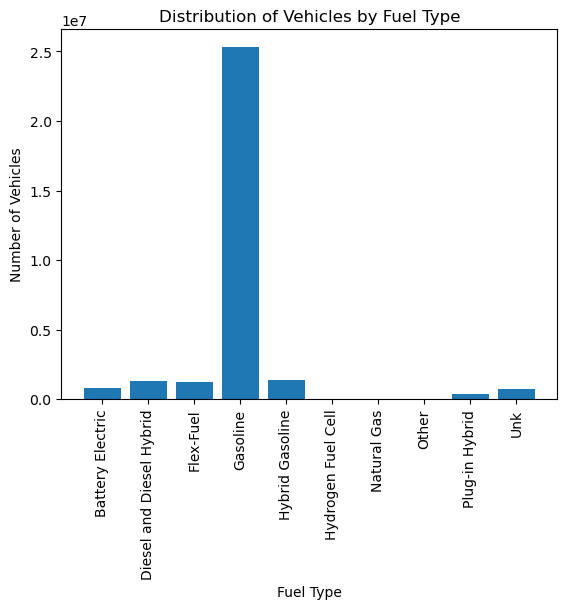

In [18]:
plt.bar(fuel_counts['Fuel'], fuel_counts['Vehicles'])
plt.xticks(rotation=90)
plt.xlabel('Fuel Type')
plt.ylabel('Number of Vehicles')
plt.title('Distribution of Vehicles by Fuel Type')
plt.show()

determine how many vehicles are of a certain make

In [19]:
# group the dataset by the 'Make' column and count the number of rows in each group
vehicles_by_Make = df.groupby('Make').sum()['Vehicles'].sort_values(ascending=False)

# print the results
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(vehicles_by_make)
    
    # calculate the total number of vehicles
df['Vehicles'].sum()
  


Make
TOYOTA                            5707406
OTHER/UNK                         3910578
HONDA                             3465385
FORD                              2956187
CHEVROLET                         2517393
NISSAN                            1697805
LEXUS                              898240
MERCEDES-BENZ                      859170
BMW                                784064
HYUNDAI                            708643
JEEP                               672488
SUBARU                             671671
DODGE                              659673
KIA                                593924
GMC                                573428
VOLKSWAGEN                         527241
MAZDA                              524213
TESLA                              523362
ACURA                              379882
Unk                                312591
AUDI                               294322
RAM                                209316
INFINITI                           186108
SCION                        

C:\Users\schowdho\AppData\Local\Temp\ipykernel_15128\1232810506.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  vehicles_by_Make = df.groupby('Make').sum()['Vehicles'].sort_values(ascending=False)


31113830

Lets represent the number of vehicles of a certain make as a ratio or percentage of the total number of vehicles in the dataset

In [20]:
# Get the count of each make
make_count = df['Make'].value_counts()

# Calculate the percentage of each make
make_percent = make_count / make_count.sum() * 100

# print the results
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(make_percent)


OTHER/UNK                         41.585469
TOYOTA                             6.350140
FORD                               6.161496
CHEVROLET                          4.538403
HONDA                              3.975731
LEXUS                              2.527201
NISSAN                             2.500345
DODGE                              2.114193
MERCEDES-BENZ                      2.099983
BMW                                2.060090
HYUNDAI                            2.036493
VOLKSWAGEN                         2.015373
JEEP                               1.904690
SUBARU                             1.880311
KIA                                1.856975
GMC                                1.794919
MAZDA                              1.770280
ACURA                              1.363398
AUDI                               1.271227
RAM                                1.157024
INFINITI                           0.894461
TESLA                              0.887160
CADILLAC                        

Lets represent the number of vehicles of a certain Fuel type as a ratio or percentage of the total number of vehicles in the dataset.

In [21]:
# count the number of vehicles for each fuel type
vehicles_by_fuel = df.groupby('Fuel').sum()['Vehicles'].sort_values(ascending=False)
# print the results
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(vehicles_by_fuel)

Fuel
Gasoline                    25316482
Hybrid Gasoline              1394351
Diesel and Diesel Hybrid     1309787
Flex-Fuel                    1204085
Battery Electric              766670
Unk                           737868
Plug-in Hybrid                335574
Natural Gas                    33641
Hydrogen Fuel Cell             12031
Other                           3341
Name: Vehicles, dtype: int64


C:\Users\schowdho\AppData\Local\Temp\ipykernel_15128\4237087797.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  vehicles_by_fuel = df.groupby('Fuel').sum()['Vehicles'].sort_values(ascending=False)


In [22]:
# calculate the total number of vehicles
total_vehicles = df['Vehicles'].sum()
# print the results
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(total_vehicles)

31113830


In [23]:
# count the number of vehicles for each fuel type
vehicles_by_fuel = df.groupby('Fuel').sum()['Vehicles'].sort_values(ascending=False)

# calculate the total number of vehicles
total_vehicles = df['Vehicles'].sum()

# calculate the percentage of vehicles for each fuel type
percentages = (vehicles_by_fuel / total_vehicles) * 100

# print the results
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(percentages)

Fuel
Gasoline                    81.367296
Hybrid Gasoline              4.481451
Diesel and Diesel Hybrid     4.209662
Flex-Fuel                    3.869935
Battery Electric             2.464081
Unk                          2.371511
Plug-in Hybrid               1.078536
Natural Gas                  0.108122
Hydrogen Fuel Cell           0.038668
Other                        0.010738
Name: Vehicles, dtype: float64


C:\Users\schowdho\AppData\Local\Temp\ipykernel_15128\2531565040.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  vehicles_by_fuel = df.groupby('Fuel').sum()['Vehicles'].sort_values(ascending=False)


<Figure size 1000x800 with 0 Axes>

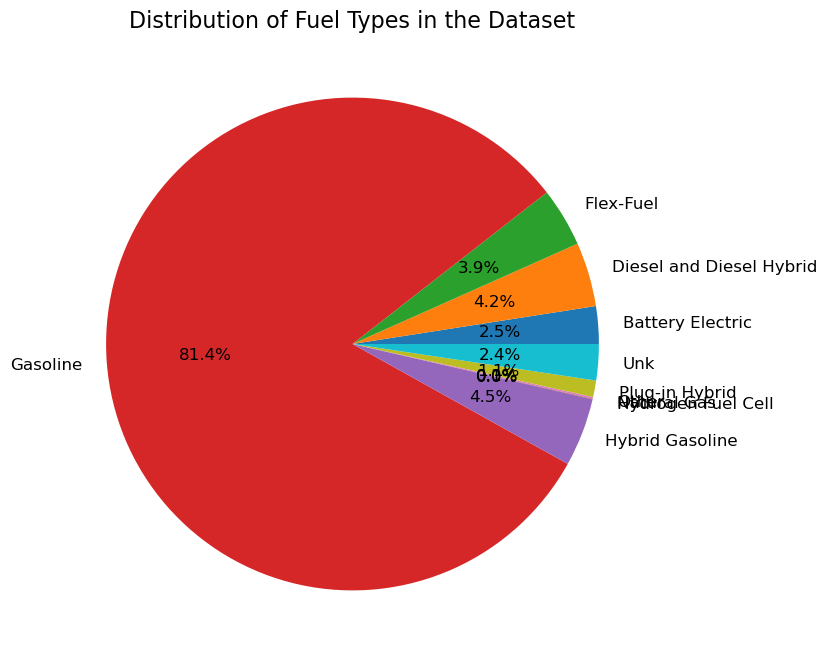

In [24]:
plt.figure(figsize=(10, 8)) # set the size of the figure
# group the data by fuel type and count the number of vehicles
fuel_counts = df.groupby('Fuel')['Vehicles'].sum().reset_index()

# plot the distribution of fuel types using a pie chart


plt.figure(figsize=(10, 8))
plt.pie(fuel_counts['Vehicles'], labels=fuel_counts['Fuel'], autopct='%1.1f%%', textprops={'fontsize': 12})
plt.title('Distribution of Fuel Types in the Dataset', fontsize=16)
plt.show()

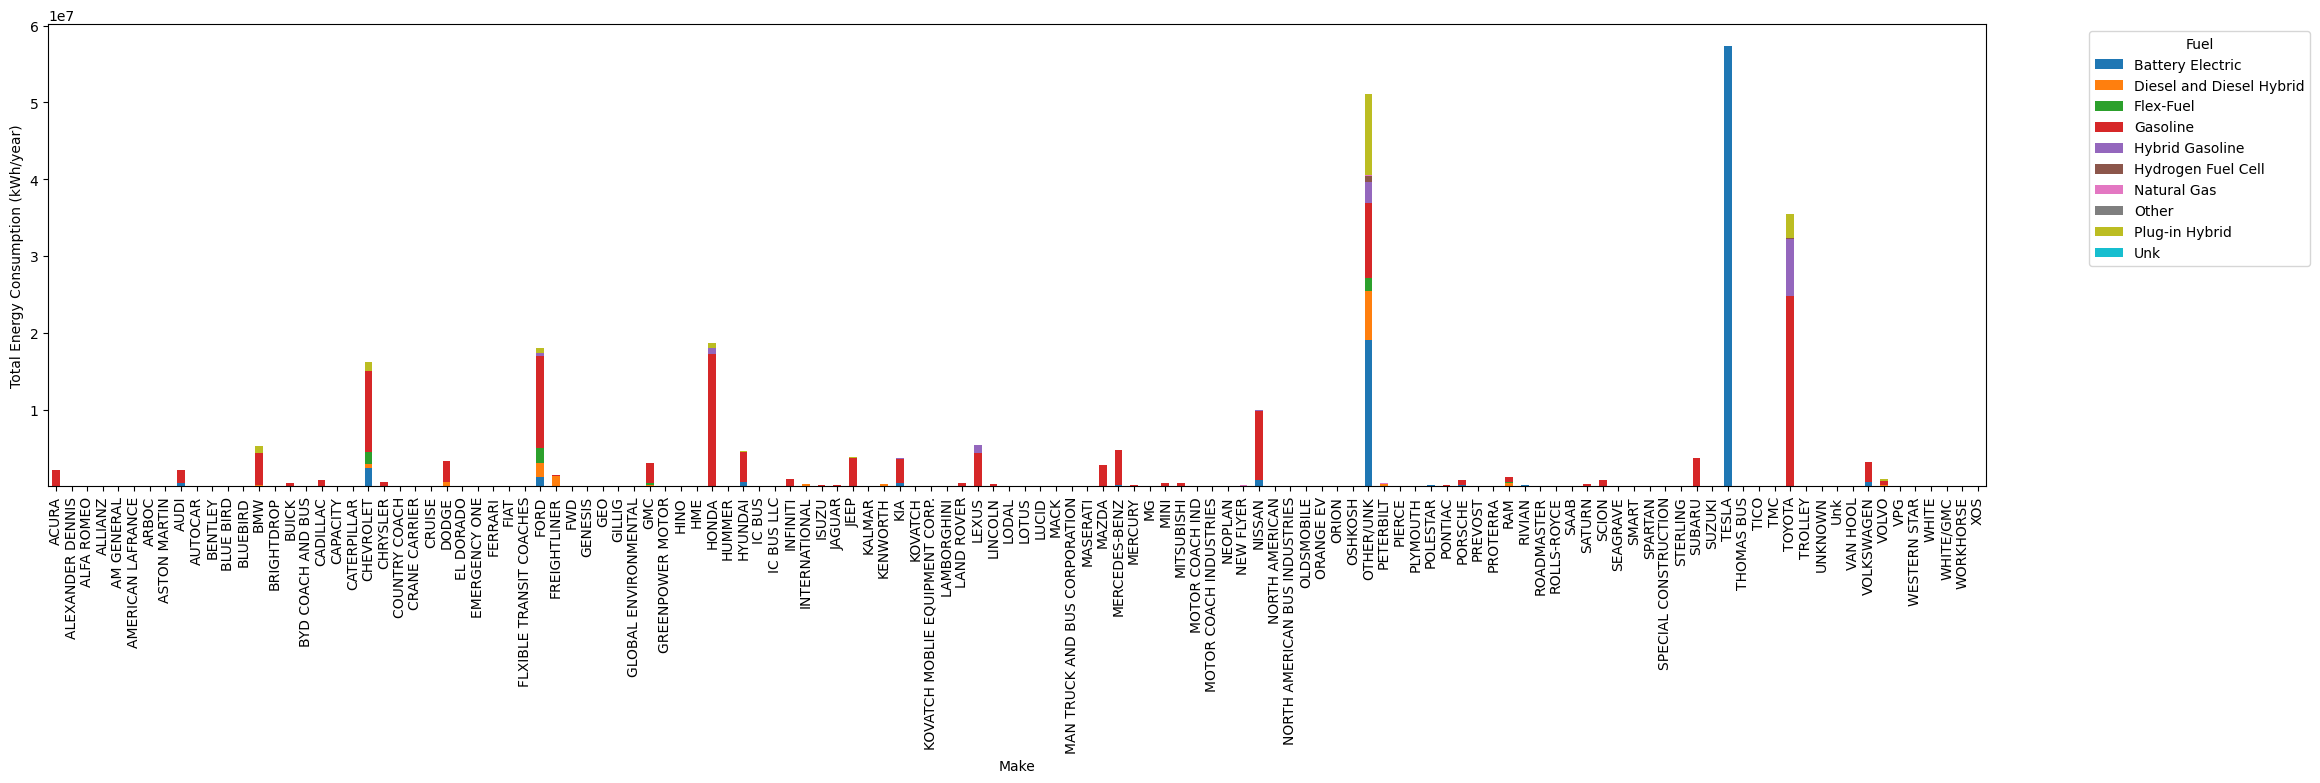

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Define energy consumption values (kWh/mile) for each fuel type
energy_consumption = {'Gasoline': 0.015, 'Other': 0, 'Diesel and Diesel Hybrid': 0.018, 'Natural Gas': 0.02, 
                      'Hybrid Gasoline': 0.025, 'Flex-Fuel': 0.015, 'Battery Electric': 0.3, 
                      'Plug-in Hybrid': 0.15, 'Hydrogen Fuel Cell': 0.2}

# Convert Duty variable to numerical (Light = 1, Heavy = 2)
df['Duty'] = df['Duty'].map({'Light': 1, 'Heavy': 2})

# Add a new column to the DataFrame to represent energy consumption per mile
df['Energy Consumption (kWh/mile)'] = df['Fuel'].map(energy_consumption)

# Calculate energy consumption per vehicle per year (kWh/year)
df['Energy Consumption (kWh/year)'] = df['Vehicles'] * df['Duty'] * df['Energy Consumption (kWh/mile)'] * 365

# Group the data by Make and Fuel, and sum the total energy consumption per year
grouped = df.groupby(['Make', 'Fuel'])['Energy Consumption (kWh/year)'].sum().unstack()

# Plot the total energy consumption by Make and Fuel using a stacked bar chart
ax = grouped.plot(kind='bar', stacked=True, figsize=(25, 6))
ax.set_ylabel('Total Energy Consumption (kWh/year)')
ax.legend(title='Fuel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


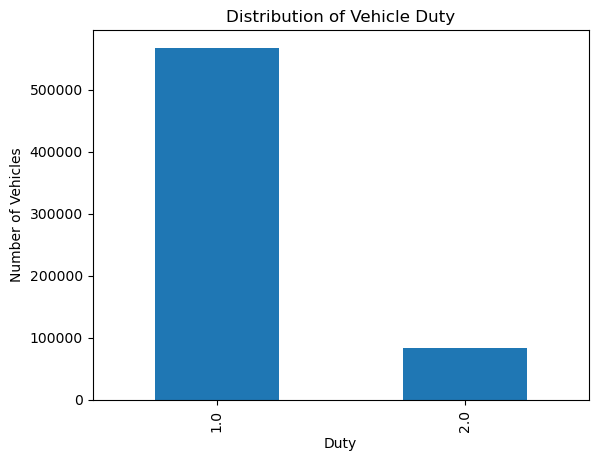

In [26]:
import matplotlib.pyplot as plt

# Count the number of light and heavy vehicles
duty_counts = df['Duty'].value_counts()

# Plot the results as a bar chart
duty_counts.plot(kind='bar')
plt.xlabel('Duty')
plt.ylabel('Number of Vehicles')
plt.title('Distribution of Vehicle Duty')
plt.show()

In [27]:
df['Vehicles'].count()

767054

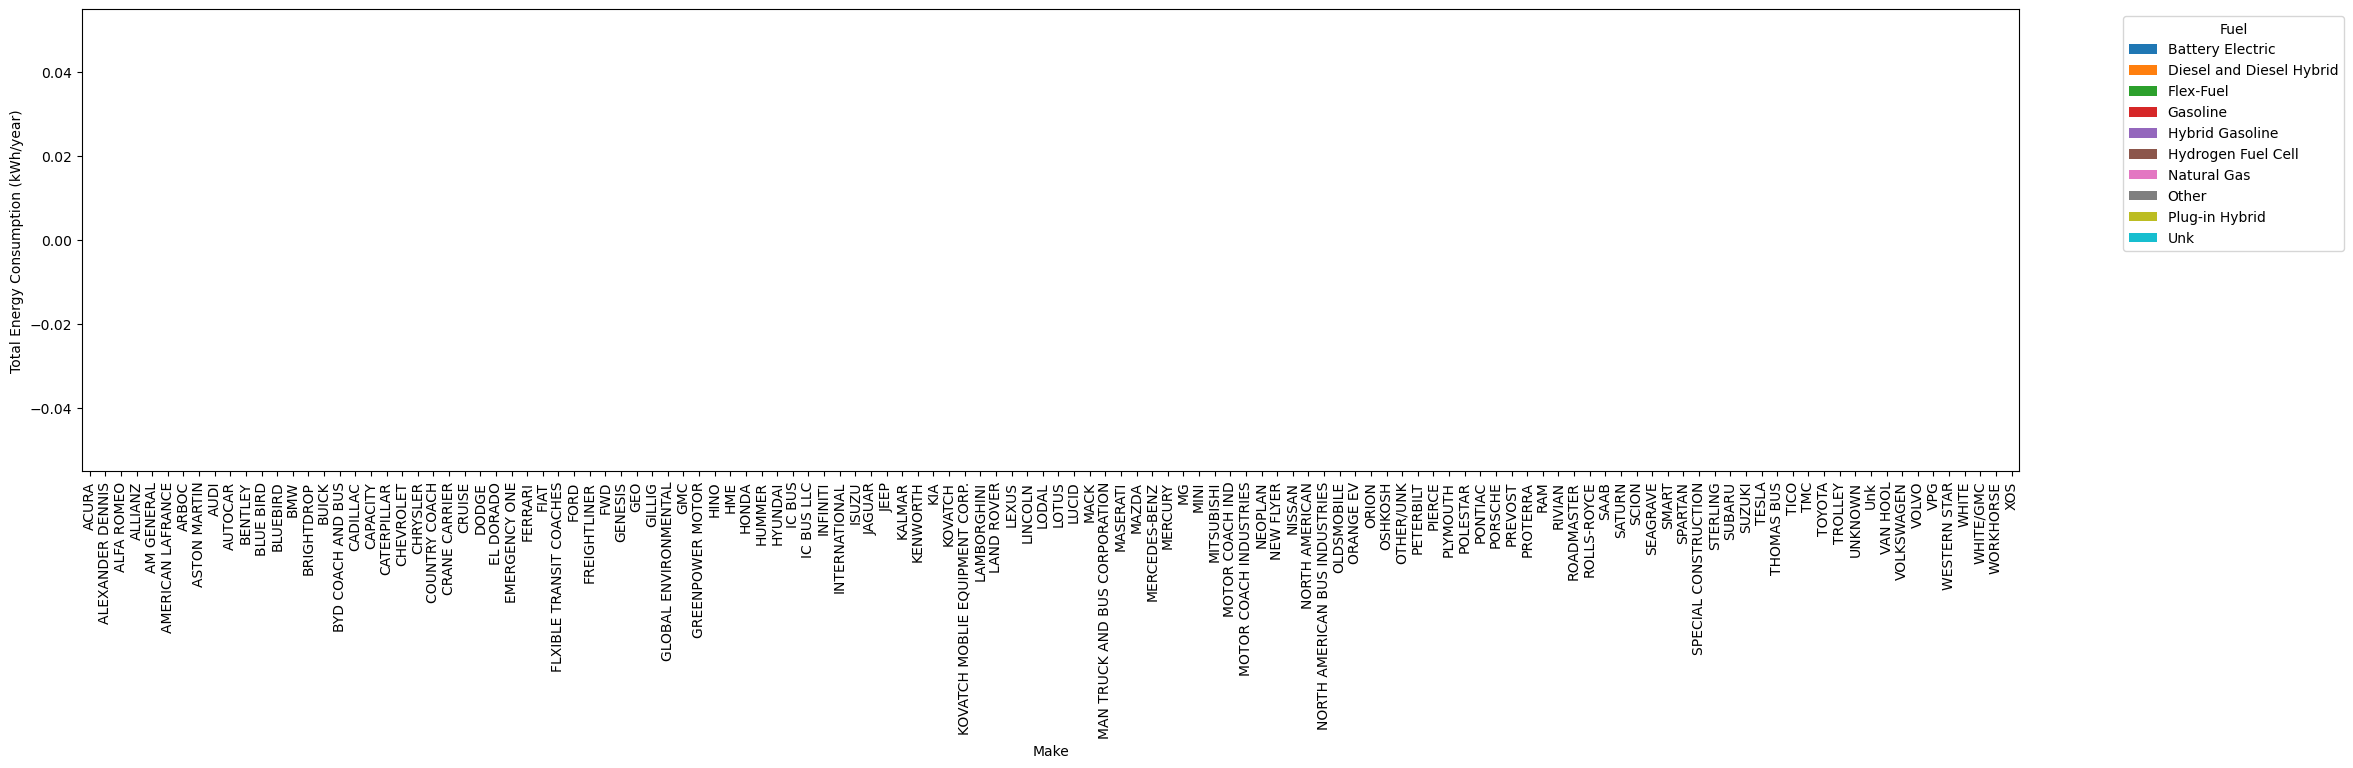

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Define energy consumption values (kWh/mile) for each fuel type
energy_consumption = {'Gasoline': 0.015, 'Other': 0, 'Diesel and Diesel Hybrid': 0.018, 'Natural Gas': 0.02, 
                      'Hybrid Gasoline': 0.025, 'Flex-Fuel': 0.015, 'Battery Electric': 0.3, 
                      'Plug-in Hybrid': 0.15, 'Hydrogen Fuel Cell': 0.2}

# Convert Duty variable to numerical (Light = 1, Heavy = 2)
df['Duty'] = df['Duty'].map({'Light': 1, 'Heavy': 2})

# Add a new column to the DataFrame to represent energy consumption per mile
df['Energy Consumption (kWh/mile)'] = df['Fuel'].map(energy_consumption)

# Calculate energy consumption per vehicle per year (kWh/year)
df['Energy Consumption (kWh/year)'] = df['Vehicles'] * df['Duty'] * df['Energy Consumption (kWh/mile)'] * 365

# Group the data by Make and Fuel, and sum the total energy consumption per year
grouped = df.groupby(['Make', 'Fuel'])['Energy Consumption (kWh/year)'].sum().unstack()

# Plot the total energy consumption by Make and Fuel using a stacked bar chart
ax = grouped.plot(kind='bar', stacked=True, figsize=(25, 6))
ax.set_ylabel('Total Energy Consumption (kWh/year)')
ax.legend(title='Fuel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [29]:
# group the dataset by the 'Model Year' column and count the number of rows in each group
vehicles_by_Year = df.groupby(['Model Year']).sum()['Vehicles'].sort_values(ascending=False)

# print the results
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(vehicles_by_Year)
    
    # calculate the total number of vehicles
df['Vehicles'].sum()

Model Year
<2009    9252986
2017     1910370
2018     1874910
2019     1851890
2016     1826666
2015     1804883
2021     1673630
2022     1605534
2020     1558047
2014     1460308
2013     1432952
2012     1165530
2008      965717
2011      940651
2010      833485
2009      679060
2023      277211
Name: Vehicles, dtype: int64


C:\Users\schowdho\AppData\Local\Temp\ipykernel_15128\3593094183.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  vehicles_by_Year = df.groupby(['Model Year']).sum()['Vehicles'].sort_values(ascending=False)


31113830

In [30]:
excel_file=pd.ExcelWriter("vehicles_by_Year2023.xlsx")
vehicles_by_Year.to_excel(excel_file)
excel_file.save()

C:\Users\schowdho\AppData\Local\Temp\ipykernel_15128\234099101.py:3: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  excel_file.save()


In [31]:
# group the dataset by the 'Model Year' column and count the number of rows in each group
vehicles_by_Duty = df.groupby(['Fuel','Duty']).sum()['Vehicles'].sort_values(ascending=False)

# print the results
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(vehicles_by_Duty)
    
    # calculate the total number of vehicles
df['Vehicles'].sum()

Series([], Name: Vehicles, dtype: int64)


C:\Users\schowdho\AppData\Local\Temp\ipykernel_15128\162242516.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  vehicles_by_Duty = df.groupby(['Fuel','Duty']).sum()['Vehicles'].sort_values(ascending=False)


31113830